## Assignments-16- Neural Network-Forestfires

## PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [2]:
# Importig Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import Dataset
data=pd.read_csv(r"C:\Users\ammaurya\Desktop\Data Science\Assignments\16-Neural Networks\forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [10]:
data.shape

(517, 31)

In [11]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [12]:
data.sample(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
115,mar,tue,88.1,25.7,67.6,3.8,15.5,27,6.3,0.0,...,0,0,0,0,1,0,0,0,0,small
81,aug,sun,90.2,99.6,631.2,6.3,17.9,44,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
263,aug,fri,91.1,141.1,629.1,7.1,19.3,39,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
390,feb,mon,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,...,1,0,0,0,0,0,0,0,0,large
460,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
278,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,...,0,0,0,0,0,0,0,0,0,large
231,sep,sun,93.5,149.3,728.6,8.1,27.8,27,3.1,0.0,...,0,0,0,0,0,0,0,0,1,large
210,oct,sat,90.6,43.7,686.9,6.7,18.4,25,3.1,0.0,...,0,0,0,0,0,0,0,1,0,large
337,sep,mon,91.6,108.4,764.0,6.2,23.0,34,2.2,0.0,...,0,0,0,0,0,0,0,0,1,large
348,sep,fri,92.1,99.0,745.3,9.6,17.4,57,4.5,0.0,...,0,0,0,0,0,0,0,0,1,small


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [14]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [16]:
# Dropping columns which are not required
data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [17]:
# Checking how much datapoints are having small and large area
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

<AxesSubplot:xlabel='size_category', ylabel='count'>

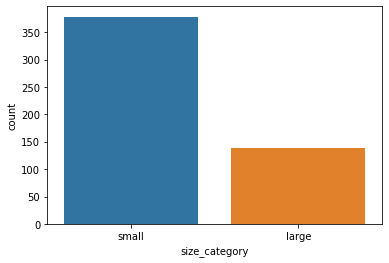

In [18]:
import seaborn as sns
sns.countplot(x = 'size_category', data = data)

In [19]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(data.area, data.size_category)

size_category,large,small
area,,
0.00,0,247
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


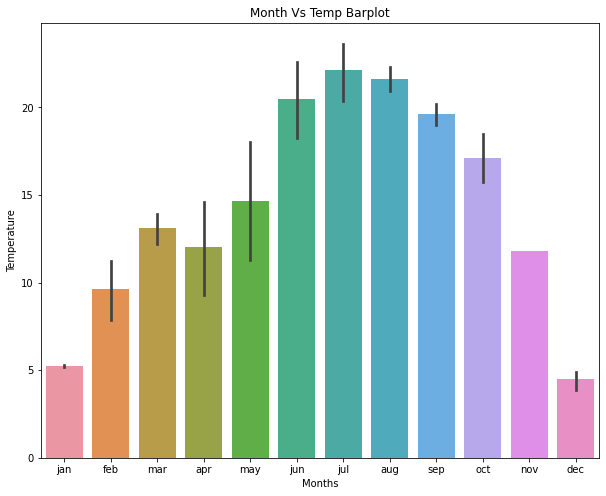

In [20]:
# Plotting Month Vs. temp plot
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,8]
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']);
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

C:\Users\ammaurya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


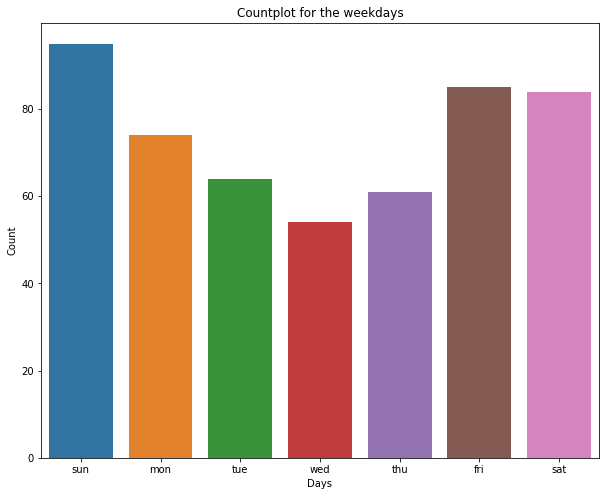

In [21]:
plt.rcParams['figure.figsize'] = [10,8]
day = sns.countplot(data['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'])
day.set(title = 'Countplot for the weekdays', xlabel = 'Days', ylabel = 'Count');

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

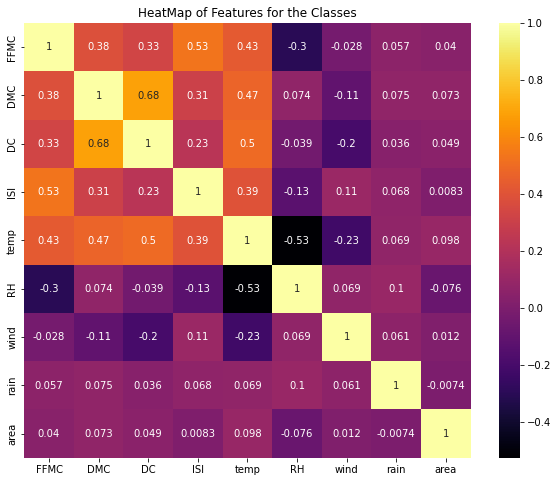

In [22]:
sns.heatmap(data.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [23]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [24]:
# Encoding month and day features
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [25]:
# Encoding target variable 'size category'
data.size_category.replace(('small', 'large'), (0, 1), inplace = True)
data.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
194,8,2,94.8,108.3,647.1,17.0,24.6,22,4.5,0.0,10.01,1
144,8,3,95.5,99.9,513.3,13.2,23.8,32,5.4,0.0,0.77,0
397,8,7,91.6,181.3,613.0,7.6,24.3,33,3.6,0.0,3.63,0
279,12,1,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,1
410,2,5,84.1,7.3,52.8,2.7,14.7,42,2.7,0.0,0.00,0


In [26]:
data.corr()['size_category'].sort_values(ascending=False)

size_category    1.000000
area             0.311322
month            0.080316
wind             0.059113
rain             0.050001
DMC              0.034715
FFMC             0.022063
DC               0.019428
day              0.016796
temp             0.006021
ISI             -0.008726
RH              -0.045243
Name: size_category, dtype: float64

In [27]:
# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
scaler.fit(data.drop('size_category',axis=1))

StandardScaler()

In [29]:
scaled_features=scaler.transform(data.drop('size_category',axis=1))
data_head=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_head

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [30]:
# Splitting data into test data and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_head,data['size_category'], test_size=0.3, random_state=42)

In [31]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (361, 11)
Shape of x_test:  (156, 11)
Shape of y_train:  (361,)
Shape of y_test:  (156,)


## Artificial Neural Network Model - Backpropagation

In [32]:
from keras.models import Sequential
from keras.layers import Dense

In [33]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [34]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# Fit the model
model.fit(x_train,y_train, epochs=100, batch_size=10)

Epoch 1/100
37/37 [==============================] - 2s 2ms/step - loss: 0.6896 - accuracy: 0.7091
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.7285
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7285
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.7285
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.7313
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.7452
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7618
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7729
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7978
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8061
Epoch 11/

37/37 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.9972
Epoch 84/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9917
Epoch 85/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9917
Epoch 86/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9917
Epoch 87/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9917
Epoch 88/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9972
Epoch 89/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 90/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 91/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9917
Epoch 92/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9945
Epoch 93/100


In [36]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9615
accuracy: 96.15%


## Artificial Neural Network Model - Tuning of Hyperparameters batch size and epochs

In [37]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [38]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=adam_v2.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [39]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train, y_train)

C:\Users\ammaurya\AppData\Local\Temp/ipykernel_7256/4006058613.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.945 total time=   1.6s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.958 total time=   1.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.958 total time=   1.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.986 total time=   1.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.903 total time=   1.3s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.958 total time=   2.1s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.986 total time=   2.4s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.972 total time=   1.9s


In [40]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9806316494941711, using {'batch_size': 40, 'epochs': 50}
0.9501521944999695,0.02718716244092732 with: {'batch_size': 10, 'epochs': 10}
0.9584855198860168,0.015078010852417315 with: {'batch_size': 10, 'epochs': 50}
0.9723363637924194,0.019562310541944596 with: {'batch_size': 10, 'epochs': 100}
0.9030821919441223,0.03390165596918947 with: {'batch_size': 20, 'epochs': 10}
0.9722983121871949,0.015215284060248116 with: {'batch_size': 20, 'epochs': 50}
0.9777777671813965,0.014163949847207664 with: {'batch_size': 20, 'epochs': 100}
0.7896499276161194,0.08700918774231224 with: {'batch_size': 40, 'epochs': 10}
0.9806316494941711,0.011054939493727824 with: {'batch_size': 40, 'epochs': 50}
0.9750380396842957,0.01043437481152975 with: {'batch_size': 40, 'epochs': 100}


## Artificial Neural Network Model - Tuning of All Hyperparameters

In [41]:
x_train.shape, y_train.shape

((361, 11), (361,))

In [42]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train, y_train)

C:\Users\ammaurya\AppData\Local\Temp/ipykernel_7256/783495484.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV 1/5; 1/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.274 total time=   0.9s
[CV 2/5; 1/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.264 total time=   0.7s
[CV 3/5; 1/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.319 total time=   0.7s
[CV 4/5; 1/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_r

[CV 5/5; 6/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.764 total time=   0.9s
[CV 1/5; 7/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 7/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 7/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 7/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.264 total time=   0.8s
[CV 3/5; 7/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 7/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.319 total time=   

[CV 5/5; 12/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 13/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 13/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.274 total time=   0.7s
[CV 2/5; 13/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 13/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 13/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 13/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.319 total time=   0.7s
[

[CV 5/5; 18/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 19/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 19/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.726 total time=   0.9s
[CV 2/5; 19/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 19/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 19/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 19/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.681 total time=   0.7s
[CV 4/

[CV 5/5; 24/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 25/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 25/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5; 25/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 25/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 25/972] START activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 25/972] END activation_function=softmax, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.681 total time=   0.7s
[C

[CV 5/5; 30/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.764 total time=   0.9s
[CV 1/5; 31/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 31/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.274 total time=   0.6s
[CV 2/5; 31/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 31/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 31/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 31/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.681 total time=   0.7s
[

[CV 5/5; 36/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 37/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 37/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.274 total time=   0.6s
[CV 2/5; 37/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 37/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.264 total time=   0.7s
[CV 3/5; 37/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 37/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.681 total time=   0.8s
[CV 4/

[CV 5/5; 42/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.764 total time=   0.9s
[CV 1/5; 43/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 43/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5; 43/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 43/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 43/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 43/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.681 total time=   0.7s
[C

[CV 5/5; 48/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 49/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 49/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5; 49/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 49/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.736 total time=   0.8s
[CV 3/5; 49/972] START activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 49/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.681 total time=   0.8s
[CV 4/5; 49/972

[CV 5/5; 54/972] END activation_function=softmax, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 55/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 55/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.726 total time=   0.8s
[CV 2/5; 55/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 55/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 55/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 55/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.681 total time=   0.7s
[CV 4/5; 55/97

[CV 5/5; 60/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 61/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 61/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5; 61/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 61/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.264 total time=   0.7s
[CV 3/5; 61/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 61/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.681 total time=   0.7s
[CV 4/5; 

[CV 5/5; 66/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 67/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 67/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5; 67/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 67/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 67/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 67/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.681 total time=   1.0s
[CV 4/5; 67/972] START

[CV 5/5; 72/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 73/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 73/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5; 73/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 73/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 73/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 73/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.681 total time=   0.7s
[CV 4/5; 73/972] START acti

[CV 1/5; 79/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5; 79/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 79/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 79/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 79/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.681 total time=   0.7s
[CV 4/5; 79/972] START activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 79/972] END activation_function=softmax, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.736 total time=   0.7s
[CV 5/5; 79/972] START

[CV 1/5; 85/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 85/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 85/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.264 total time=   0.8s
[CV 3/5; 85/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 85/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.319 total time=   0.8s
[CV 4/5; 85/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 85/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.264 total time=  

[CV 5/5; 90/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 91/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 91/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 91/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 91/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.736 total time=   0.8s
[CV 3/5; 91/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 91/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.319 total time=   0.8s

[CV 5/5; 96/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 97/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 97/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 97/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 97/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.736 total time=   0.8s
[CV 3/5; 97/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 97/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.681 total time=   

[CV 5/5; 102/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 103/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 103/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 103/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 103/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.736 total time=   0.8s
[CV 3/5; 103/972] START activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 103/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.681 total time=   1.0s
[

[CV 5/5; 108/972] END activation_function=softmax, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 109/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 109/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 109/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 109/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.736 total time=   0.8s
[CV 3/5; 109/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 109/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.681 total time=  

[CV 4/5; 114/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.264 total time=   0.7s
[CV 5/5; 114/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 114/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.236 total time=   0.7s
[CV 1/5; 115/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 115/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.726 total time=   0.9s
[CV 2/5; 115/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 115/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.264 total tim

[CV 3/5; 120/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 120/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 120/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.736 total time=   0.8s
[CV 5/5; 120/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 120/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 121/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 121/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.726 total time=   0.7s
[

[CV 3/5; 126/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.681 total time=   1.1s
[CV 4/5; 126/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 126/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.736 total time=   1.0s
[CV 5/5; 126/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 126/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.764 total time=   1.3s
[CV 1/5; 127/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 127/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.726 total time=   1.0

[CV 3/5; 132/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.681 total time=   1.0s
[CV 4/5; 132/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 132/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.736 total time=   0.7s
[CV 5/5; 132/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 132/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 133/972] START activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 133/972] END activation_function=softmax, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/

[CV 3/5; 138/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.681 total time=   1.3s
[CV 4/5; 138/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 138/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.736 total time=   1.6s
[CV 5/5; 138/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 138/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.764 total time=   1.3s
[CV 1/5; 139/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 139/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.726 total time=   1.1s
[CV 2/5;

[CV 3/5; 144/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.319 total time=   0.7s
[CV 4/5; 144/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 144/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.264 total time=   0.7s
[CV 5/5; 144/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 144/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 145/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 145/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.274 total time=   0.6s
[CV 2

[CV 3/5; 150/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.319 total time=   1.0s
[CV 4/5; 150/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 150/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.736 total time=   0.7s
[CV 5/5; 150/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 150/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 151/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 151/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.726 total time=   1.0s
[CV 2/5; 151/

[CV 3/5; 156/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.681 total time=   1.2s
[CV 4/5; 156/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 156/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.736 total time=   1.2s
[CV 5/5; 156/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 156/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.764 total time=   1.2s
[CV 1/5; 157/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 157/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.726 total time=   1.1s
[CV 2/5; 157/972] STAR

[CV 3/5; 162/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.681 total time=   1.6s
[CV 4/5; 162/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 162/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.736 total time=   1.3s
[CV 5/5; 162/972] START activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 162/972] END activation_function=softmax, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.764 total time=   1.3s
[CV 1/5; 163/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 163/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.726 total time=   1.4s
[CV 2/5

[CV 2/5; 168/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.264 total time=   1.3s
[CV 3/5; 168/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 168/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.681 total time=   1.2s
[CV 4/5; 168/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 168/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.264 total time=   1.2s
[CV 5/5; 168/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 168/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.764 total 

[CV 1/5; 174/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.274 total time=   1.0s
[CV 2/5; 174/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 174/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.736 total time=   0.9s
[CV 3/5; 174/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 174/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.681 total time=   0.9s
[CV 4/5; 174/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 174/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.264 total time=  

[CV 5/5; 179/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.764 total time=   0.9s
[CV 1/5; 180/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 180/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.726 total time=   0.8s
[CV 2/5; 180/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 180/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.736 total time=   0.8s
[CV 3/5; 180/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 180/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.681 total 

[CV 5/5; 185/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 186/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 186/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 186/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 186/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.736 total time=   1.0s
[CV 3/5; 186/972] START activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 186/972] END activation_function=softmax, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.681 total time=   0.8s
[

[CV 4/5; 191/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.736 total time=   0.8s
[CV 5/5; 191/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 191/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 192/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 192/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 192/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 192/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.736 total time=  

[CV 3/5; 197/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 197/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 197/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 197/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 197/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 198/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 198/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.726 total 

[CV 3/5; 203/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.681 total time=   1.0s
[CV 4/5; 203/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 203/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.736 total time=   0.8s
[CV 5/5; 203/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 203/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 204/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 204/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.726 total time=   0.6s
[

[CV 3/5; 209/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 209/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 209/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 209/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 209/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 210/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 210/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5;

[CV 3/5; 215/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 215/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 215/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 215/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 215/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.764 total time=   1.0s
[CV 1/5; 216/972] START activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 216/972] END activation_function=softmax, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.726 total time=   0.7s
[

[CV 3/5; 221/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 221/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 221/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.264 total time=   0.7s
[CV 5/5; 221/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 221/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 222/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 222/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.274 total time=   0.7s
[CV 2/5;

[CV 3/5; 227/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 227/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 227/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.264 total time=   0.7s
[CV 5/5; 227/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 227/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.236 total time=   0.9s
[CV 1/5; 228/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 228/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.726 total time=   0.9s
[CV 2/5; 228/97

[CV 3/5; 233/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.681 total time=   1.6s
[CV 4/5; 233/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 233/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.264 total time=   1.2s
[CV 5/5; 233/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 233/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 234/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 234/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5;

[CV 3/5; 239/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 239/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 239/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.736 total time=   1.1s
[CV 5/5; 239/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 239/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.764 total time=   1.0s
[CV 1/5; 240/972] START activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 240/972] END activation_function=softmax, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.726 total time=   1.2s
[CV 2/5; 240/972] STAR

[CV 3/5; 245/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 245/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 245/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 245/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 245/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 246/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 246/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.726 total time=   0.8s
[CV 2/5;

[CV 3/5; 251/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.681 total time=   1.0s
[CV 4/5; 251/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 251/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   0.7s
[CV 5/5; 251/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 251/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 252/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 252/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.726 total time=   0.7s
[

[CV 3/5; 257/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 257/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 257/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.736 total time=   0.9s
[CV 5/5; 257/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 257/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.764 total time=   0.9s
[CV 1/5; 258/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 258/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 258/97

[CV 3/5; 263/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.708 total time=   0.9s
[CV 4/5; 263/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 263/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.736 total time=   0.9s
[CV 5/5; 263/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 263/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 264/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 264/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 264/972] STAR

[CV 3/5; 269/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.722 total time=   0.9s
[CV 4/5; 269/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 269/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.736 total time=   0.8s
[CV 5/5; 269/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 269/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.764 total time=   0.9s
[CV 1/5; 270/972] START activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 270/972] END activation_function=relu, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 270/97

[CV 3/5; 275/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 275/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 275/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.722 total time=   0.7s
[CV 5/5; 275/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 275/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 276/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 276/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 276/97

[CV 3/5; 281/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.681 total time=   1.3s
[CV 4/5; 281/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 281/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.736 total time=   0.9s
[CV 5/5; 281/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 281/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 282/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 282/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 282/972] STAR

[CV 3/5; 287/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.681 total time=   0.9s
[CV 4/5; 287/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 287/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.736 total time=   1.0s
[CV 5/5; 287/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 287/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 288/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 288/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 288/97

[CV 3/5; 293/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 293/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 293/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 293/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 293/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.764 total time=   1.0s
[CV 1/5; 294/972] START activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 294/972] END activation_function=relu, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.726 total time=   0.9s
[CV 2/5; 294/972] START activ

[CV 3/5; 299/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 299/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 299/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 299/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 299/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 300/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 300/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 300/972] START activ

[CV 3/5; 305/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 305/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 305/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 305/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 305/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 306/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 306/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 306/972] STAR

[CV 4/5; 311/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 311/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 311/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 312/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 312/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 312/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 312/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.736 total time=   0.7s
[CV 3/5; 312/972] START activation_f

[CV 5/5; 317/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.764 total time=   1.2s
[CV 1/5; 318/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 318/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 318/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 318/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.736 total time=   0.8s
[CV 3/5; 318/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 318/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 318/972] START activation_function

[CV 1/5; 324/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 324/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 324/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.736 total time=   0.8s
[CV 3/5; 324/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 324/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.681 total time=   0.7s
[CV 4/5; 324/972] START activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 324/972] END activation_function=relu, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.736 total time=   0.9s
[CV 5/5; 324/972] START activation_f

[CV 1/5; 330/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.726 total time=   0.9s
[CV 2/5; 330/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 330/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.736 total time=   0.9s
[CV 3/5; 330/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 330/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.681 total time=   1.1s
[CV 4/5; 330/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 330/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.736 total time=   0.9s
[CV 5/5;

[CV 1/5; 336/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 336/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 336/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.736 total time=   0.7s
[CV 3/5; 336/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 336/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.681 total time=   0.7s
[CV 4/5; 336/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 336/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.736 total time=   0.7s
[CV 5/5; 336/97

[CV 1/5; 342/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 342/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 342/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.736 total time=   0.7s
[CV 3/5; 342/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 342/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.681 total time=   1.0s
[CV 4/5; 342/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 342/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.736 total time=   0.7s
[CV 5/5;

[CV 1/5; 348/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 348/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 348/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.736 total time=   0.7s
[CV 3/5; 348/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 348/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.694 total time=   0.7s
[CV 4/5; 348/972] START activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 348/972] END activation_function=relu, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.736 total time=   0.7s
[CV 5/5; 348/972] STAR

[CV 1/5; 354/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 354/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 354/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.736 total time=   0.7s
[CV 3/5; 354/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 354/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.681 total time=   0.7s
[CV 4/5; 354/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 354/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   0.7s
[CV 5/5; 354/97

[CV 1/5; 360/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 360/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 360/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.625 total time=   0.8s
[CV 3/5; 360/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 360/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 360/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 360/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.764 total time=   0.7s
[CV 5/5;

[CV 1/5; 366/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 366/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 366/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.736 total time=   0.7s
[CV 3/5; 366/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 366/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.681 total time=   0.9s
[CV 4/5; 366/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 366/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.736 total time=   1.2s
[CV 5/5; 366/972] STAR

[CV 1/5; 372/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.726 total time=   1.3s
[CV 2/5; 372/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 372/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.736 total time=   1.0s
[CV 3/5; 372/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 372/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 372/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 372/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.736 total time=   0.8s
[CV 5/5; 372/972] START activ

[CV 1/5; 378/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.726 total time=   0.8s
[CV 2/5; 378/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 378/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.736 total time=   0.9s
[CV 3/5; 378/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 378/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.681 total time=   1.0s
[CV 4/5; 378/972] START activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 378/972] END activation_function=relu, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.736 total time=   0.9s
[CV 5/5; 378/972] STAR

[CV 1/5; 384/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 384/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 384/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.736 total time=   0.9s
[CV 3/5; 384/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 384/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 384/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 384/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.736 total time=   0.8s
[CV 5/5; 384/972] START activ

[CV 1/5; 390/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 390/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 390/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.736 total time=   0.7s
[CV 3/5; 390/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 390/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 390/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 390/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.736 total time=   0.7s
[CV 5/5; 390/972] START activation_f

[CV 2/5; 396/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.736 total time=   0.8s
[CV 3/5; 396/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 396/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.681 total time=   1.1s
[CV 4/5; 396/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 396/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.736 total time=   0.8s
[CV 5/5; 396/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 396/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 397/972] START activ

[CV 3/5; 402/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 402/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 402/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.736 total time=   0.8s
[CV 5/5; 402/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 402/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 403/972] START activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 403/972] END activation_function=relu, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 403/972] START activation_functi

[CV 3/5; 408/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 408/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 408/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.736 total time=   0.8s
[CV 5/5; 408/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 408/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 409/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 409/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5;

[CV 3/5; 414/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 414/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 414/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   0.7s
[CV 5/5; 414/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 414/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 415/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 415/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.726 total time=   0.6s
[CV 2

[CV 3/5; 420/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 420/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 420/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.736 total time=   1.2s
[CV 5/5; 420/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 420/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.764 total time=   1.3s
[CV 1/5; 421/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 421/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.726 total time=   0.8s
[CV 2/5; 421/

[CV 3/5; 426/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.694 total time=   1.0s
[CV 4/5; 426/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 426/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.750 total time=   0.8s
[CV 5/5; 426/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 426/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.764 total time=   0.7s
[CV 1/5; 427/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 427/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.753 total time=   0.6s
[CV 2/5; 427/972] STAR

[CV 3/5; 432/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.681 total time=   0.7s
[CV 4/5; 432/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 432/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.792 total time=   0.8s
[CV 5/5; 432/972] START activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 432/972] END activation_function=relu, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 433/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 433/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 433/97

[CV 3/5; 438/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.681 total time=   0.7s
[CV 4/5; 438/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 438/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.708 total time=   0.7s
[CV 5/5; 438/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 438/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 439/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 439/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5; 439/

[CV 3/5; 444/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.681 total time=   0.7s
[CV 4/5; 444/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 444/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.736 total time=   0.8s
[CV 5/5; 444/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 444/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 445/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 445/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 445/972] STAR

[CV 3/5; 450/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 450/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 450/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.736 total time=   0.8s
[CV 5/5; 450/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 450/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 451/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 451/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 451/972] S

[CV 3/5; 456/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 456/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 456/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.736 total time=   0.8s
[CV 5/5; 456/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 456/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.764 total time=   1.1s
[CV 1/5; 457/972] START activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 457/972] END activation_function=relu, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 457/972] START act

[CV 3/5; 462/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.681 total time=   0.8s
[CV 4/5; 462/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 462/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.736 total time=   1.3s
[CV 5/5; 462/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 462/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.764 total time=   1.5s
[CV 1/5; 463/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 463/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.726 total time=   1.1s
[CV 2/5; 463/972] START activ

[CV 3/5; 468/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.681 total time=   0.7s
[CV 4/5; 468/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 468/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.736 total time=   1.2s
[CV 5/5; 468/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 468/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.764 total time=   1.1s
[CV 1/5; 469/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 469/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 469/972] START ac

[CV 4/5; 474/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.736 total time=   0.9s
[CV 5/5; 474/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 474/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.764 total time=   0.9s
[CV 1/5; 475/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 475/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.726 total time=   0.7s
[CV 2/5; 475/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 475/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.736 total time=   0.9s
[CV 3/5; 475/972] START activati

[CV 5/5; 480/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.764 total time=   0.8s
[CV 1/5; 481/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 481/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.726 total time=   1.1s
[CV 2/5; 481/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 481/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.736 total time=   1.1s
[CV 3/5; 481/972] START activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 481/972] END activation_function=relu, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.681 total time=   0.8s
[CV 4/5; 481/972] START activation_function

[CV 1/5; 487/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.726 total time=   1.0s
[CV 2/5; 487/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 487/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.736 total time=   1.1s
[CV 3/5; 487/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 487/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.681 total time=   0.9s
[CV 4/5; 487/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 487/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.736 total time=   0.9s
[CV 5/5;

[CV 1/5; 493/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.685 total time=   0.6s
[CV 2/5; 493/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 493/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 493/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 493/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.681 total time=   0.7s
[CV 4/5; 493/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 493/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   0.8s
[

[CV 1/5; 499/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5; 499/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 499/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 499/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 499/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.694 total time=   0.7s
[CV 4/5; 499/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 499/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.764 total time=   0.7s
[CV 5/5; 499/97

[CV 1/5; 505/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.767 total time=   0.7s
[CV 2/5; 505/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 505/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.750 total time=   0.9s
[CV 3/5; 505/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 505/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.694 total time=   0.8s
[CV 4/5; 505/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 505/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.736 total time=   0.8s
[CV 5/5; 505/972] STAR

[CV 1/5; 511/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.767 total time=   0.8s
[CV 2/5; 511/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 511/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.736 total time=   0.9s
[CV 3/5; 511/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 511/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.736 total time=   0.9s
[CV 4/5; 511/972] START activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 511/972] END activation_function=tanh, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.764 total time=   0.9s
[CV 5/5; 511/97

[CV 1/5; 517/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.685 total time=   0.6s
[CV 2/5; 517/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 517/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 517/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 517/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.694 total time=   0.7s
[CV 4/5; 517/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 517/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.736 total time=   0.7s
[CV 5/5; 517/97

[CV 1/5; 523/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5; 523/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 523/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 523/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 523/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.681 total time=   0.7s
[CV 4/5; 523/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 523/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.736 total time=   0.7s
[CV 5/5; 523/972] STAR

[CV 1/5; 529/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.740 total time=   0.6s
[CV 2/5; 529/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 529/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 529/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 529/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.694 total time=   0.7s
[CV 4/5; 529/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 4/5; 529/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.778 total time=   0.7s
[CV 5/5; 529/97

[CV 1/5; 535/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.781 total time=   0.6s
[CV 2/5; 535/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 535/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   0.7s
[CV 3/5; 535/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 535/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.681 total time=   0.7s
[CV 4/5; 535/972] START activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 535/972] END activation_function=tanh, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.792 total time=   0.7s
[CV 5/5; 535/972] START activ

[CV 1/5; 541/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.726 total time=   0.6s
[CV 2/5; 541/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 541/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 541/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 541/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.681 total time=   0.7s
[CV 4/5; 541/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 541/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.736 total time=   0.7s
[CV 5/5; 541/972] START activ

[CV 2/5; 547/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.736 total time=   0.7s
[CV 3/5; 547/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 547/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.681 total time=   0.7s
[CV 4/5; 547/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 547/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.736 total time=   0.7s
[CV 5/5; 547/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 547/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.764 total time=   0.7s
[CV 1/5; 548/972] STAR

[CV 3/5; 553/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.681 total time=   0.7s
[CV 4/5; 553/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 553/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.736 total time=   0.7s
[CV 5/5; 553/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 553/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.764 total time=   0.7s
[CV 1/5; 554/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 554/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.726 total time=   0.6s
[CV 2/5; 554/972] START activation_f

[CV 4/5; 559/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.736 total time=   0.7s
[CV 5/5; 559/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 559/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.764 total time=   0.8s
[CV 1/5; 560/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 560/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.726 total time=   0.8s
[CV 2/5; 560/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 560/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.736 total time=   0.7s
[CV 3/5; 560/972] START activation_function

[CV 5/5; 565/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.764 total time=   0.7s
[CV 1/5; 566/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 566/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.726 total time=   0.6s
[CV 2/5; 566/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 566/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.736 total time=   0.7s
[CV 3/5; 566/972] START activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 566/972] END activation_function=tanh, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 566/972] START activation_f

[CV 5/5; 571/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.764 total time=   1.5s
[CV 1/5; 572/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 572/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.726 total time=   0.9s
[CV 2/5; 572/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 572/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.736 total time=   1.1s
[CV 3/5; 572/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 572/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.681 total time=   1.1s
[CV 4/5;

[CV 5/5; 577/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.764 total time=   1.5s
[CV 1/5; 578/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 578/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.726 total time=   0.9s
[CV 2/5; 578/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 578/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.736 total time=   1.1s
[CV 3/5; 578/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 578/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.694 total time=   1.1s
[CV 4/5; 578/97

[CV 5/5; 583/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.764 total time=   1.1s
[CV 1/5; 584/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 584/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.753 total time=   0.6s
[CV 2/5; 584/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 584/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.736 total time=   0.7s
[CV 3/5; 584/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 584/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.667 total time=   0.7s
[CV 4/5;

[CV 5/5; 589/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.778 total time=   1.1s
[CV 1/5; 590/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 590/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.740 total time=   0.7s
[CV 2/5; 590/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 590/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.764 total time=   0.8s
[CV 3/5; 590/972] START activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 590/972] END activation_function=tanh, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.722 total time=   0.8s
[CV 4/5; 590/972] STAR

[CV 5/5; 595/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.764 total time=   1.1s
[CV 1/5; 596/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 596/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.726 total time=   0.7s
[CV 2/5; 596/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 596/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.667 total time=   1.1s
[CV 3/5; 596/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 596/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.694 total time=   1.2s
[CV 4/5; 596/97

[CV 5/5; 601/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.708 total time=   1.2s
[CV 1/5; 602/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 602/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.767 total time=   0.8s
[CV 2/5; 602/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 602/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.764 total time=   0.9s
[CV 3/5; 602/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 602/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.667 total time=   0.9s
[CV 4/5;

[CV 5/5; 607/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.764 total time=   1.1s
[CV 1/5; 608/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 608/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.753 total time=   0.6s
[CV 2/5; 608/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 608/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.736 total time=   0.7s
[CV 3/5; 608/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 608/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 608/972] STAR

[CV 5/5; 613/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.806 total time=   1.2s
[CV 1/5; 614/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 614/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.740 total time=   0.7s
[CV 2/5; 614/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 614/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.792 total time=   0.8s
[CV 3/5; 614/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 614/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 614/972] START activ

[CV 5/5; 619/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.778 total time=   1.1s
[CV 1/5; 620/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 620/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.740 total time=   0.9s
[CV 2/5; 620/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 620/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   1.1s
[CV 3/5; 620/972] START activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 620/972] END activation_function=tanh, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.722 total time=   1.0s
[CV 4/5; 620/972] STAR

[CV 5/5; 625/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.764 total time=   1.1s
[CV 1/5; 626/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 626/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.726 total time=   0.7s
[CV 2/5; 626/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 626/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.736 total time=   0.9s
[CV 3/5; 626/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 626/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 626/972] START activ

[CV 5/5; 631/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.764 total time=   1.5s
[CV 1/5; 632/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 632/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.726 total time=   1.1s
[CV 2/5; 632/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 632/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.736 total time=   1.2s
[CV 3/5; 632/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 632/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.681 total time=   0.9s
[CV 4/5; 632/972] START activation_f

[CV 1/5; 638/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.726 total time=   0.7s
[CV 2/5; 638/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 638/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.736 total time=   0.8s
[CV 3/5; 638/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 638/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 638/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 638/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 638/972] START activ

[CV 2/5; 644/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.736 total time=   0.8s
[CV 3/5; 644/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 644/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 644/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 644/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.736 total time=   0.8s
[CV 5/5; 644/972] START activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 644/972] END activation_function=tanh, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 645/972] START activation_function

[CV 3/5; 650/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 650/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 650/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   0.7s
[CV 5/5; 650/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 650/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 651/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 651/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5;

[CV 3/5; 656/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.653 total time=   0.9s
[CV 4/5; 656/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 656/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.736 total time=   0.9s
[CV 5/5; 656/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 656/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 657/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 657/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.726 total time=   0.7s
[

[CV 3/5; 662/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.681 total time=   1.0s
[CV 4/5; 662/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 662/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.750 total time=   1.0s
[CV 5/5; 662/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 662/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 663/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 663/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.740 total time=   0.6s
[CV 2/5; 663/97

[CV 3/5; 668/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.708 total time=   0.8s
[CV 4/5; 668/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 668/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.736 total time=   0.9s
[CV 5/5; 668/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 668/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.833 total time=   1.3s
[CV 1/5; 669/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 669/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.753 total time=   0.8s
[CV 2/5; 669/972] STAR

[CV 3/5; 674/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.736 total time=   0.7s
[CV 4/5; 674/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 674/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   0.7s
[CV 5/5; 674/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 674/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.792 total time=   0.7s
[CV 1/5; 675/972] START activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 675/972] END activation_function=tanh, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 675/97

[CV 3/5; 680/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.708 total time=   0.7s
[CV 4/5; 680/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 680/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.708 total time=   0.8s
[CV 5/5; 680/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 680/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.694 total time=   0.7s
[CV 1/5; 681/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 681/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.658 total time=   0.6s
[CV 2/5; 681/97

[CV 3/5; 686/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 686/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 686/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.750 total time=   0.7s
[CV 5/5; 686/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 686/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 687/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 687/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 687/972] STAR

[CV 3/5; 692/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.694 total time=   0.9s
[CV 4/5; 692/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 692/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.750 total time=   0.8s
[CV 5/5; 692/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 692/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.778 total time=   0.7s
[CV 1/5; 693/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 693/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 693/97

[CV 3/5; 698/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 698/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 698/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.792 total time=   0.7s
[CV 5/5; 698/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 698/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.806 total time=   0.7s
[CV 1/5; 699/972] START activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 699/972] END activation_function=tanh, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.740 total time=   0.6s
[CV 2/5; 699/972] START activ

[CV 3/5; 704/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 704/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 704/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 704/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 704/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 705/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 705/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 705/972] START activ

[CV 3/5; 710/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 710/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 710/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 710/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 710/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.764 total time=   1.0s
[CV 1/5; 711/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 711/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 711/972] STAR

[CV 4/5; 716/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.736 total time=   1.1s
[CV 5/5; 716/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 716/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.764 total time=   1.0s
[CV 1/5; 717/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 717/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.726 total time=   0.9s
[CV 2/5; 717/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 717/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.736 total time=   1.0s
[CV 3/5; 717/972] START activation_f

[CV 5/5; 722/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.764 total time=   1.1s
[CV 1/5; 723/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 723/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.726 total time=   0.9s
[CV 2/5; 723/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 723/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.736 total time=   1.0s
[CV 3/5; 723/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 723/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.681 total time=   0.9s
[CV 4/5; 723/972] START activation_function

[CV 1/5; 729/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.726 total time=   0.8s
[CV 2/5; 729/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 729/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.736 total time=   1.1s
[CV 3/5; 729/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 729/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.681 total time=   1.1s
[CV 4/5; 729/972] START activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 729/972] END activation_function=tanh, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.736 total time=   1.0s
[CV 5/5; 729/972] START activation_f

[CV 1/5; 735/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 735/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 735/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.736 total time=   0.9s
[CV 3/5; 735/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 735/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.681 total time=   0.9s
[CV 4/5; 735/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 735/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.736 total time=  

[CV 5/5; 740/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.764 total time=   1.0s
[CV 1/5; 741/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 741/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.726 total time=   0.8s
[CV 2/5; 741/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 741/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.736 total time=   0.8s
[CV 3/5; 741/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 741/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.681 total time=   1.3s
[

[CV 5/5; 746/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.764 total time=   1.0s
[CV 1/5; 747/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 747/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.767 total time=   0.8s
[CV 2/5; 747/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 747/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.736 total time=   0.8s
[CV 3/5; 747/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 747/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.708 total time=  

[CV 5/5; 752/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.750 total time=   1.0s
[CV 1/5; 753/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 753/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.726 total time=   0.8s
[CV 2/5; 753/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 753/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.722 total time=   0.8s
[CV 3/5; 753/972] START activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 753/972] END activation_function=linear, dropout_rate=0.0, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.681 total time=   1.0s
[CV 4/5;

[CV 5/5; 758/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.764 total time=   1.0s
[CV 1/5; 759/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 759/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.726 total time=   0.8s
[CV 2/5; 759/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 759/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.722 total time=   0.8s
[CV 3/5; 759/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 759/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.667 total time=   0.9s
[

[CV 5/5; 764/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.736 total time=   1.5s
[CV 1/5; 765/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 765/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.740 total time=   0.8s
[CV 2/5; 765/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 765/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   0.9s
[CV 3/5; 765/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 765/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.542 total time=  

[CV 5/5; 770/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.778 total time=   0.9s
[CV 1/5; 771/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 771/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.740 total time=   0.9s
[CV 2/5; 771/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 771/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.736 total time=   0.9s
[CV 3/5; 771/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 771/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.694 total time=   0.9s
[CV 4/5;

[CV 5/5; 776/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.778 total time=   1.0s
[CV 1/5; 777/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 777/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.726 total time=   0.8s
[CV 2/5; 777/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 777/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.736 total time=   0.9s
[CV 3/5; 777/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 777/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.722 total time=   1.0s
[CV 4/5; 777/97

[CV 5/5; 782/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.792 total time=   0.9s
[CV 1/5; 783/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 783/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.767 total time=   0.8s
[CV 2/5; 783/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 783/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.778 total time=   0.9s
[CV 3/5; 783/972] START activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 783/972] END activation_function=linear, dropout_rate=0.0, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.722 total time=   0.9s
[CV 4/5;

[CV 5/5; 788/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 789/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 789/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.726 total time=   1.0s
[CV 2/5; 789/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 789/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.736 total time=   0.7s
[CV 3/5; 789/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 789/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.681 total time=   0.7s
[CV 4/5; 789/97

[CV 5/5; 794/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.764 total time=   1.0s
[CV 1/5; 795/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 795/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 795/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 795/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.736 total time=   1.0s
[CV 3/5; 795/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 795/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.681 total time=   0.9s
[CV 4/5; 795/972] STAR

[CV 5/5; 800/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 801/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 801/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 801/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 801/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.736 total time=   0.7s
[CV 3/5; 801/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 801/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.681 total time=   0.7s
[CV 4/5; 801/97

[CV 5/5; 806/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 807/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 807/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 807/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 807/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.736 total time=   0.7s
[CV 3/5; 807/972] START activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 807/972] END activation_function=linear, dropout_rate=0.0, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.681 total time=   0.7s
[CV 4/5; 807/972] START activ

[CV 5/5; 812/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.778 total time=   0.8s
[CV 1/5; 813/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 813/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 813/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 813/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.736 total time=   1.3s
[CV 3/5; 813/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 813/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.694 total time=  

[CV 4/5; 818/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 818/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 818/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.778 total time=   0.8s
[CV 1/5; 819/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 819/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 819/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 819/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.736 total 

[CV 4/5; 824/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.750 total time=   0.9s
[CV 5/5; 824/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 824/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.764 total time=   0.9s
[CV 1/5; 825/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 825/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 825/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 825/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.736 total time=   0.7s
[

[CV 4/5; 830/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.708 total time=   0.9s
[CV 5/5; 830/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 830/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 831/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 831/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 831/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 831/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.750 total time=   0.7s
[CV 3/5;

[CV 4/5; 836/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.708 total time=   1.4s
[CV 5/5; 836/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 836/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.778 total time=   0.8s
[CV 1/5; 837/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 837/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 837/972] START activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 837/972] END activation_function=linear, dropout_rate=0.1, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   0.7s
[

[CV 4/5; 842/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.708 total time=   0.8s
[CV 5/5; 842/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 842/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.764 total time=   1.2s
[CV 1/5; 843/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 843/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.740 total time=   1.5s
[CV 2/5; 843/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 843/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.708 total time=   1.0s
[

[CV 4/5; 848/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.736 total time=   0.8s
[CV 5/5; 848/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 848/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 849/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 849/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 849/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 849/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.736 total time=   0.8s
[CV 3/5;

[CV 4/5; 854/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.764 total time=   0.9s
[CV 5/5; 854/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 854/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 855/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 855/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.767 total time=   0.7s
[CV 2/5; 855/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 855/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.750 total time=   0.8s
[

[CV 4/5; 860/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.764 total time=   0.8s
[CV 5/5; 860/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 860/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.778 total time=   0.9s
[CV 1/5; 861/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 861/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.795 total time=   0.9s
[CV 2/5; 861/972] START activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 861/972] END activation_function=linear, dropout_rate=0.1, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.750 total time=   1.1s
[CV 3/5; 861/97

[CV 4/5; 866/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.736 total time=   0.9s
[CV 5/5; 866/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 866/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 867/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 867/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 867/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 867/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.736 total time=   0.8s
[CV 3/5; 867/97

[CV 4/5; 872/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.736 total time=   0.8s
[CV 5/5; 872/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 872/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.764 total time=   1.2s
[CV 1/5; 873/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 873/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 873/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 873/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.736 total time=   0.8s
[CV 3/5;

[CV 4/5; 878/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 878/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 878/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.764 total time=   1.1s
[CV 1/5; 879/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 879/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.726 total time=   1.1s
[CV 2/5; 879/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 879/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.736 total time=   0.9s
[CV 3/5; 879/972] STAR

[CV 4/5; 884/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.736 total time=   0.8s
[CV 5/5; 884/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 884/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.764 total time=   0.9s
[CV 1/5; 885/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 885/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 885/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 885/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.736 total time=   0.9s
[CV 3/5; 885/972] START activ

[CV 4/5; 890/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.736 total time=   0.8s
[CV 5/5; 890/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 890/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 891/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 891/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.726 total time=   0.7s
[CV 2/5; 891/972] START activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 891/972] END activation_function=linear, dropout_rate=0.1, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.736 total time=   0.7s
[CV 3/5; 891/972] STAR

[CV 4/5; 896/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.722 total time=   1.0s
[CV 5/5; 896/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 896/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.764 total time=   0.9s
[CV 1/5; 897/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 897/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.726 total time=   0.8s
[CV 2/5; 897/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 897/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.736 total time=  

[CV 3/5; 902/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 902/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 902/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.750 total time=   0.7s
[CV 5/5; 902/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 902/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 903/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 903/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.726 total time=   0.6s
[

[CV 3/5; 908/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.694 total time=   0.7s
[CV 4/5; 908/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 908/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.764 total time=   0.7s
[CV 5/5; 908/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 908/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 909/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 909/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.753 total time=  

[CV 3/5; 914/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.681 total time=   0.7s
[CV 4/5; 914/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 914/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.750 total time=   0.7s
[CV 5/5; 914/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 914/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.792 total time=   0.8s
[CV 1/5; 915/972] START activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 915/972] END activation_function=linear, dropout_rate=0.2, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.795 total time=   0.7s
[CV 2/5;

[CV 3/5; 920/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.681 total time=   0.9s
[CV 4/5; 920/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 920/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   1.1s
[CV 5/5; 920/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 920/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 921/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 921/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.726 total time=   0.7s
[

[CV 3/5; 926/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.569 total time=   0.7s
[CV 4/5; 926/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 926/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.569 total time=   1.2s
[CV 5/5; 926/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 926/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   1.4s
[CV 1/5; 927/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 927/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.740 total time=  

[CV 3/5; 932/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.694 total time=   0.7s
[CV 4/5; 932/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 932/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.736 total time=   0.7s
[CV 5/5; 932/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 932/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 933/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 933/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.740 total time=   0.7s
[CV 2/5;

[CV 3/5; 938/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.764 total time=   0.8s
[CV 4/5; 938/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 938/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.764 total time=   0.8s
[CV 5/5; 938/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 938/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.778 total time=   0.8s
[CV 1/5; 939/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 939/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.753 total time=   0.7s
[CV 2/5; 939/97

[CV 3/5; 944/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.694 total time=   0.7s
[CV 4/5; 944/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 944/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.778 total time=   0.7s
[CV 5/5; 944/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 944/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.722 total time=   0.7s
[CV 1/5; 945/972] START activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 945/972] END activation_function=linear, dropout_rate=0.2, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.671 total time=   0.7s
[CV 2/5;

[CV 3/5; 950/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.681 total time=   1.0s
[CV 4/5; 950/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 950/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.736 total time=   1.6s
[CV 5/5; 950/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 950/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.764 total time=   0.9s
[CV 1/5; 951/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 951/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.726 total time=   1.0s
[CV 2/5; 951/97

[CV 3/5; 956/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 956/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 956/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.736 total time=   0.8s
[CV 5/5; 956/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 956/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.764 total time=   0.7s
[CV 1/5; 957/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 957/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 957/972] STAR

[CV 3/5; 962/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.681 total time=   0.8s
[CV 4/5; 962/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 962/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.736 total time=   0.8s
[CV 5/5; 962/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 962/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.764 total time=   0.8s
[CV 1/5; 963/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 963/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.726 total time=   0.6s
[CV 2/5; 963/97

[CV 3/5; 968/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.681 total time=   0.9s
[CV 4/5; 968/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 968/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.736 total time=   1.0s
[CV 5/5; 968/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 968/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.764 total time=   0.9s
[CV 1/5; 969/972] START activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 969/972] END activation_function=linear, dropout_rate=0.2, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.726 total time=   1.0s
[CV 2/5; 969/972] START activ

In [ ]:
## Best : 0.7812404870986939, using {'activation_function': 'tanh', 'dropout_rate': 0.2, 'init': 'normal', 'learning_rate': 0.1, 'neuron1': 16, 'neuron2': 2}

In [ ]:
## Building final model with above best parameters obtained from tuning hyper paramters

In [44]:
# create model
final_model = Sequential()
final_model.add(Dense(4,input_dim = 11,kernel_initializer = 'normal',activation = 'tanh'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2,input_dim = 4,kernel_initializer = 'normal',activation = 'tanh'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation = 'sigmoid'))
    
adam=adam_v2.Adam(learning_rate = 0.01)
    

In [45]:
# Compile Model
final_model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])

In [46]:
# Fit the model
final_model.fit(x_train,y_train, epochs=50, batch_size=40)


Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.6661 - accuracy: 0.6981
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.7424
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.7452
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7645
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7839
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.4857 - accuracy: 0.8144
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8283
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8172
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8310
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8310
Epoch 11/50
10/10 [

In [47]:
# evaluate the model
scores = final_model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (final_model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.1173 - accuracy: 0.9551
accuracy: 95.51%
